## Tarea 8

## Moreno Puente Emilia Cristina

1) Polinomio grado 1

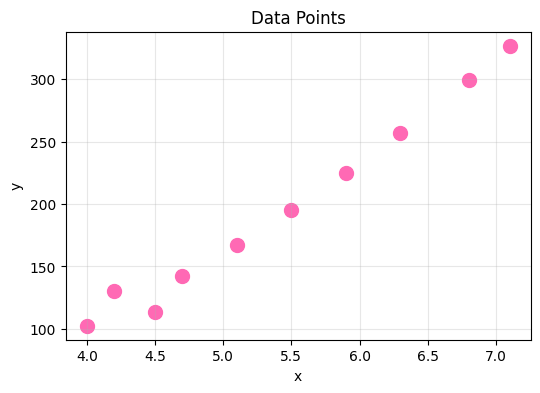

In [10]:
import numpy as np

import matplotlib.pyplot as plt
xs = [
    4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1
   
]

ys = [
    102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72
]

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="#FF69B4", s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points")
plt.grid(True, alpha=0.3)
plt.show()

In [29]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[12-27 17:15:25][INFO] emore| 2025-12-27 17:15:25.209223


In [30]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    # coeficiente del término independiente
    c_ind = sum(ys)
    # coeficiente del parámetro 1
    c_1 = sum(xs)
    # coeficiente del parámetro 0
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi
        # coeficiente del parámetro 1
        c_1 += xi * xi
        # coeficiente del parámetro 0
        c_0 += xi
    return (c_1, c_0, c_ind)

In [31]:
m, b = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_1, der_parcial_0]
)
print(f"m: {m}, b: {b}")

[12-27 17:15:37][INFO] Se ajustarán 2 parámetros.
m: 71.61024372023518, b: -191.5724185264723


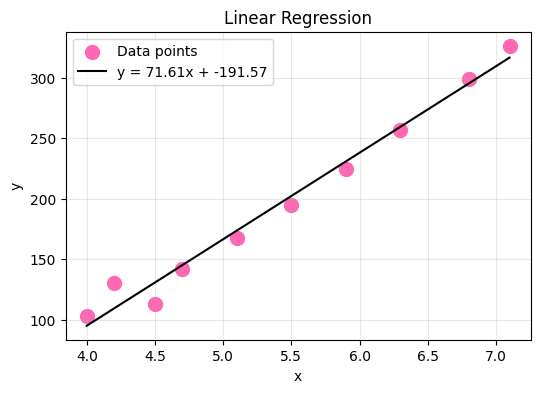

In [32]:
import numpy as np

import matplotlib.pyplot as plt

xs = [
    4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1
   
]

ys = [
    102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72
]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#FF69B4", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= m * x+ b

plt.plot(x, y, color="black", label=f"y = {m:.2f}x + {b:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1) Polinomio grado 2

In [41]:

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi
        # coeficiente del parámetro 2
        c_2 += xi**2
        # coeficiente del parámetro 1
        c_1 += xi
        
    # coeficiente del parámetro 0
    c_0 = len(xs)
    
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi* yi
        # coeficiente del parámetro 2
        c_2 += xi**3
        # coeficiente del parámetro 1
        c_1 += xi**2
        # coeficiente del parámetro 0
        c_0 += xi
        
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi**2 * yi
        # coeficiente del parámetro 2
        c_2 += xi**4
        # coeficiente del parámetro 1
        c_1 += xi**3
        # coeficiente del parámetro 0
        c_0 += xi**2
        
    return (c_2, c_1, c_0, c_ind)

In [42]:
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

[12-27 17:30:59][INFO] emore| 2025-12-27 17:30:59.289326


In [43]:
xs = [
    4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1
   
]

ys = [
    102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72
]

a,b,c = ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_2, der_parcial_1, der_parcial_0]
)
print(f"a: {a}, b: {b}, c: {c}")

[12-27 17:31:02][INFO] Se ajustarán 3 parámetros.
a: 8.217072320284009, b: -19.308603792138197, c: 51.00078939037112


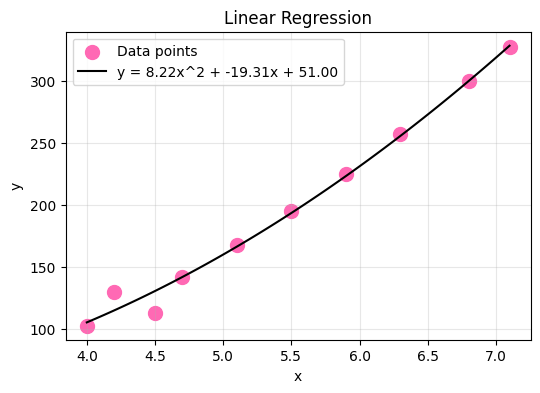

In [44]:
import numpy as np

import matplotlib.pyplot as plt

xs = [
    4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1
   
]

ys = [
    102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72
]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#FF69B4", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= a*x**2+ b*x + c

plt.plot(x, y, color="black", label=f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

3) Polinomio grado 3
   

In [51]:

def der_parcial_3(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi
        # coeficiente del parámetro 3
        c_3 += xi**3
        # coeficiente del parámetro 2
        c_2 += xi**2
        # coeficiente del parámetro 1
        c_1 += xi
        
        # coeficiente del parámetro 0
    c_0 = len(xs)
    
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi*xi
        # coeficiente del parámetro 3
        c_3 += xi**4
        # coeficiente del parámetro 2
        c_2 += xi**3
        # coeficiente del parámetro 1
        c_1 += xi**2
        # coeficiente del parámetro 0
        c_0 += xi
        
    
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi**2 * yi
        # coeficiente del parámetro 3
        c_3 += xi**5
        # coeficiente del parámetro 2
        c_2 += xi**4
        # coeficiente del parámetro 1
        c_1 += xi**3
        # coeficiente del parámetro 0
        c_0 += xi**2
        
    return (c_3,c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float,float,float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
        c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
        # ``xs``: lista de valores de x.
        ``ys``: lista de valores de y.
        ## Return
        # ``c_1``: coeficiente del parámetro 1.
        ``c_0``: coeficiente del parámetro 0.
        ``c_ind``: coeficiente del término independiente.
    """
    c_3=0
    c_2=0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += yi*xi**3
         # coeficiente del parámetro 3
        c_3 += xi**6
        # coeficiente del parámetro 2
        c_2 += xi**5
        # coeficiente del parámetro 1
        c_1 += xi**4
        # coeficiente del parámetro 0
        c_0 += xi**3
        
    return (c_3, c_2, c_1, c_0, c_ind)

###################################################
import logging
from sys import stdout
from datetime import datetime
import os
import numpy as np
from typing import Callable


logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")


# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float], list[float], list[float]], tuple]],
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    # Solve the linear system using NumPy
    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

###################################################
xs = [
    4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1
   
]

ys = [
    102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72
]

a,b,c,d= ajustar_min_cuadrados(
    xs=xs, ys=ys, gradiente=[der_parcial_3,der_parcial_2, der_parcial_1, der_parcial_0]
)
print(f"a: {a}, b: {b}, c: {c}, d: {d}")

[12-27 18:30:11][INFO] emore| 2025-12-27 18:30:11.779331
[12-27 18:30:11][INFO] Se ajustarán 4 parámetros.
a: -2.6068387238906934, b: 51.560956952104824, c: -254.87478347115385, d: 469.16326543936214


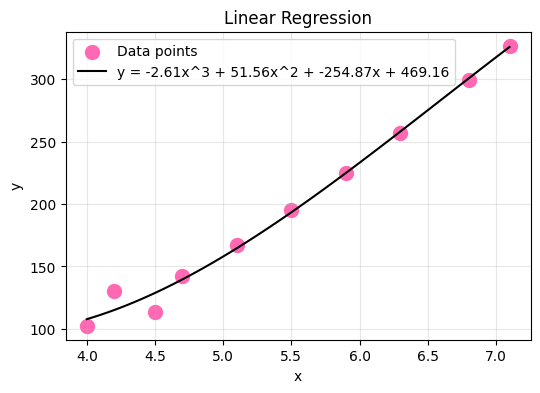

In [52]:
import numpy as np

import matplotlib.pyplot as plt

xs = [
    4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1
   
]

ys = [
    102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72
]

# Create the plot
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(xs, ys, color="#FF69B4", label="Data points", s=100)

# Plot the fitted line
x= np.linspace(min(xs), max(xs), 100)

y= a*x**3 + b*x**2 + c*x + d

plt.plot(x, y, color="black", label=f"y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

d. Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ 


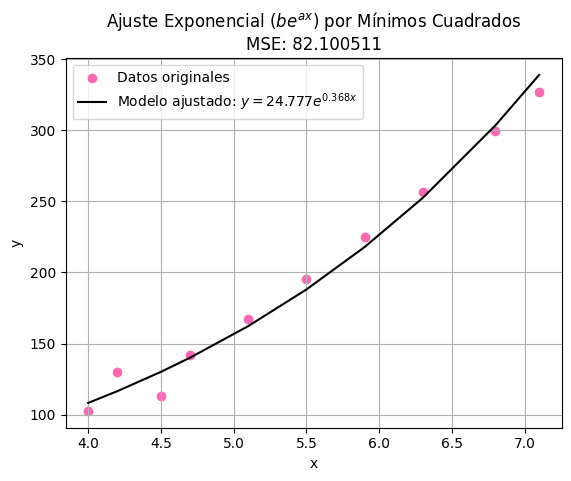

In [73]:
def ajuste_exponencial(xs, ys):
    log_ys = np.log(ys)
    
    coeficientes = np.polyfit(xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * np.exp(a * xs)
    
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color='#FF69B4', label='Datos originales')
    plt.plot(xs, ys_pred, color='BLACK', label=f'Modelo ajustado: $y = {b:.3f}e^{{{a:.3f}x}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Exponencial ($be^{{ax}}$) por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()

ajuste_exponencial(xs, ys)

5) de la forma $bx^a$

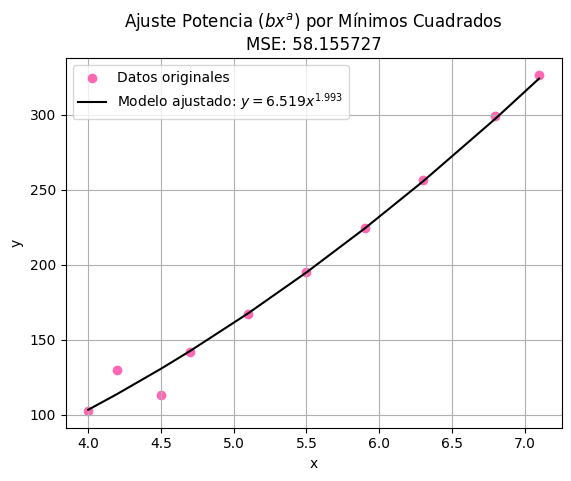

In [75]:
def ajuste_potencia(xs, ys):
    log_xs = np.log(xs)
    log_ys = np.log(ys)
    
    coeficientes = np.polyfit(log_xs, log_ys, 1)
    a = coeficientes[0]
    B = coeficientes[1] 
    b = np.exp(B)  
    
    ys_pred = b * (xs ** a)
    mse = np.mean((ys - ys_pred) ** 2)
    
    plt.scatter(xs, ys, color='#FF69B4', label='Datos originales')
    plt.plot(xs, ys_pred, color='BLACK', label=f'Modelo ajustado: $y = {b:.3f}x^{{{a:.3f}}}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste Potencia ($bx^{{a}}$) por Mínimos Cuadrados\nMSE: {mse:.6f}')
    plt.legend()
    plt.grid()
    plt.show()
    
ajuste_potencia(xs, ys)